In [11]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import acquire


from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 using a different max_depth value.

Which model performs better on your in-sample data?

Which model performs best on your out-of-sample data, the validate set?

In [2]:
from acquire import get_titanic_data

In [3]:
df = acquire.get_titanic_data()
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
def clean_titanic_data(df):
    '''
    Takes in a titanic dataframe and returns a cleaned dataframe
    Arguments: df - a pandas dataframe with the expected feature names and columns
    Return: clean_df - a dataframe with the cleaning operations performed on it
    '''
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    # Drop columns 
    columns_to_drop = ['embarked', 'class', 'passenger_id', 'deck', 'Unnamed: 0']
    df = df.drop(columns = columns_to_drop)
    # encoded categorical variables
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    return df.drop(columns=['sex', 'embark_town'])  

In [5]:
df = clean_titanic_data(df)
df.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [6]:
def impute_age(train, validate, test):
    '''
    Imputes the mean age of train to all three datasets
    '''
    imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
    imputer = imputer.fit(train[['age']])
    train[['age']] = imputer.transform(train[['age']])
    validate[['age']] = imputer.transform(validate[['age']])
    test[['age']] = imputer.transform(test[['age']])
    return train, validate, test

In [9]:
def prep_titanic_data(df): 
    train, test = train_test_split(df,
                               train_size = 0.8,
                               stratify = df.survived,
                               random_state=1234)
    train, validate = train_test_split(train,
                                  train_size = 0.7,
                                  stratify = train.survived,
                                  random_state=1234)
    train, validate, test = impute_age(train, validate, test)
    return train, validate, test

In [12]:
train, validate, test = prep_titanic_data(df)


In [18]:
train.shape, validate.shape, test.shape

((436, 10), (188, 10), (156, 10))

In [19]:
# determine baseline model
train.survived.value_counts() 

0    256
1    180
Name: survived, dtype: int64

In [62]:
df['baseline_prediction'] = 0
df.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline_prediction
0,0,3,22.0,1,0,7.2500,0,1,0,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,1,0,1,0


In [61]:
baseline_accuracy = (df.baseline_prediction == df.actual).mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')

0      False
1      False
2      False
3      False
4      False
       ...  
885    False
887    False
888    False
889    False
890    False
Name: baseline_prediction, Length: 780, dtype: bool

In [23]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [40]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=3, random_state=123)


In [41]:
clf = clf.fit(X_train, y_train)

[Text(362.7, 332.955, 'sex_male <= 0.5\ngini = 0.485\nsamples = 436\nvalue = [256, 180]\nclass = 0'),
 Text(181.35, 237.825, 'pclass <= 2.5\ngini = 0.407\nsamples = 162\nvalue = [46, 116]\nclass = 1'),
 Text(90.675, 142.695, 'age <= 3.0\ngini = 0.108\nsamples = 87\nvalue = [5, 82]\nclass = 1'),
 Text(45.3375, 47.565, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(136.0125, 47.565, 'gini = 0.089\nsamples = 86\nvalue = [4, 82]\nclass = 1'),
 Text(272.025, 142.695, 'age <= 38.5\ngini = 0.496\nsamples = 75\nvalue = [41, 34]\nclass = 0'),
 Text(226.6875, 47.565, 'gini = 0.5\nsamples = 66\nvalue = [32, 34]\nclass = 1'),
 Text(317.3625, 47.565, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = 0'),
 Text(544.05, 237.825, 'age <= 5.5\ngini = 0.358\nsamples = 274\nvalue = [210, 64]\nclass = 0'),
 Text(453.375, 142.695, 'sibsp <= 3.0\ngini = 0.355\nsamples = 13\nvalue = [3, 10]\nclass = 1'),
 Text(408.03749999999997, 47.565, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = 1'),
 T

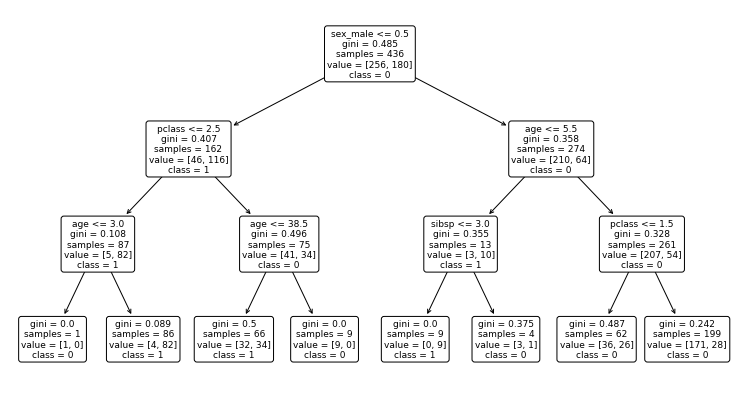

In [42]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names = clf.classes_.astype(str), rounded=True)


In [43]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:15]


array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [44]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:15]

array([[0.85929648, 0.14070352],
       [0.85929648, 0.14070352],
       [0.48484848, 0.51515152],
       [0.85929648, 0.14070352],
       [0.04651163, 0.95348837],
       [0.48484848, 0.51515152],
       [0.58064516, 0.41935484],
       [0.48484848, 0.51515152],
       [0.58064516, 0.41935484],
       [0.58064516, 0.41935484],
       [0.85929648, 0.14070352],
       [0.        , 1.        ],
       [0.04651163, 0.95348837],
       [0.85929648, 0.14070352],
       [0.85929648, 0.14070352]])

In [45]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 0.79


In [46]:
# confusion matrix

confusion_matrix(y_train, y_pred)


array([[220,  36],
       [ 55, 125]])

In [47]:
y_train.value_counts()


0    256
1    180
Name: survived, dtype: int64

In [48]:
import pandas as pd

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)


,0,1
0,220,36
1,55,125


In [49]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       256
           1       0.78      0.69      0.73       180

    accuracy                           0.79       436
   macro avg       0.79      0.78      0.78       436
weighted avg       0.79      0.79      0.79       436



In [50]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.78


In [51]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.81      0.81       110
           1       0.73      0.73      0.73        78

    accuracy                           0.78       188
   macro avg       0.77      0.77      0.77       188
weighted avg       0.78      0.78      0.78       188



Accuracy of Decision Tree classifier on training set: 0.78
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       256
           1       0.92      0.51      0.66       180

    accuracy                           0.78       436
   macro avg       0.83      0.74      0.75       436
weighted avg       0.81      0.78      0.76       436

Accuracy of Decision Tree classifier on validate set: 0.78
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       110
           1       0.86      0.56      0.68        78

    accuracy                           0.78       188
   macro avg       0.81      0.75      0.76       188
weighted avg       0.80      0.78      0.77       188



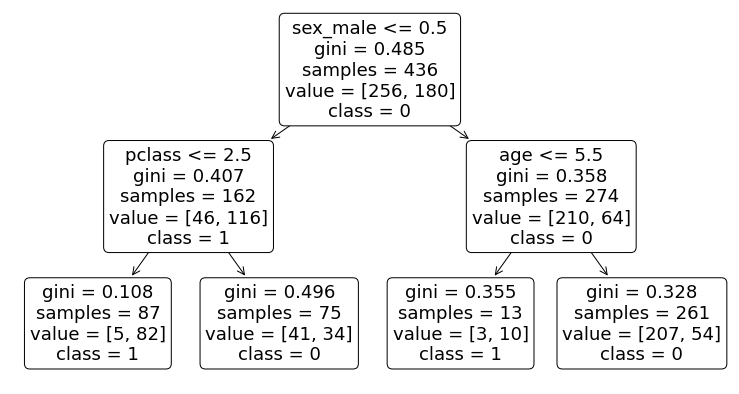

In [54]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=2, random_state=123)


clf = clf.fit(X_train, y_train)

plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names = clf.classes_.astype(str), rounded=True)


# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:15]


y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:15]

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))


# confusion matrix

confusion_matrix(y_train, y_pred)


y_train.value_counts()


import pandas as pd

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)


print(classification_report(y_train, y_pred))


print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


Accuracy of Decision Tree classifier on training set: 0.87
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       256
           1       0.90      0.77      0.83       180

    accuracy                           0.87       436
   macro avg       0.88      0.86      0.86       436
weighted avg       0.87      0.87      0.87       436

Accuracy of Decision Tree classifier on validate set: 0.79
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       110
           1       0.75      0.73      0.74        78

    accuracy                           0.79       188
   macro avg       0.78      0.78      0.78       188
weighted avg       0.79      0.79      0.79       188



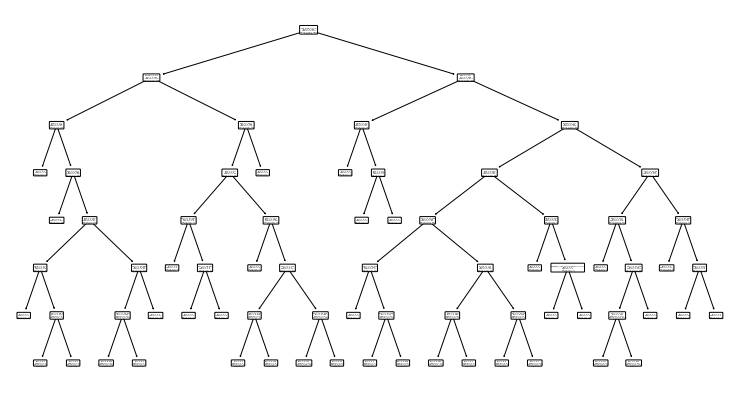

In [53]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=7, random_state=123)


clf = clf.fit(X_train, y_train)

plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names = clf.classes_.astype(str), rounded=True)


# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:15]


y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:15]

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))


# confusion matrix

confusion_matrix(y_train, y_pred)


y_train.value_counts()


import pandas as pd

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)


print(classification_report(y_train, y_pred))


print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))
